In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log

from sklearn.linear_model import LinearRegression

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [32]:
df = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
X_train = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
X_test = pd.read_csv('wk3_kc_house_test_data.csv',dtype=dtype_dict)
X_val = pd.read_csv('wk3_kc_house_valid_data.csv',dtype=dtype_dict)
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv',dtype=dtype_dict)
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv',dtype=dtype_dict)
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv',dtype=dtype_dict)
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv',dtype=dtype_dict)
df = df.sort_values(by=['sqft_living','price'])
# set1 = set1.sort_values(by=['sqft_living','price'])
# set2 = set2.sort_values(by=['sqft_living','price'])
# set3 = set3.sort_values(by=['sqft_living','price'])
# set4 = set4.sort_values(by=['sqft_living','price'])



## Create DataFrame with polynomials

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: x**power)
           
    return poly_dataframe

In [5]:
poly1_data = polynomial_dataframe(df['sqft_living'],1)
poly1_data['price'] = df['price']
poly1_data[['power_1']].shape

(21613, 1)

#### Create Linear_Regression Model for poly1_data

In [6]:
model1 = LinearRegression()
model1.fit(poly1_data[['power_1']],df[['price']])
# Two brackets because scikit learn only accept 2D array
# poly1_data['power_1'].shape = (3, )    <-- 1D
# poly1_data[['power_1']].shape = (3, 1) <-- 2D


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

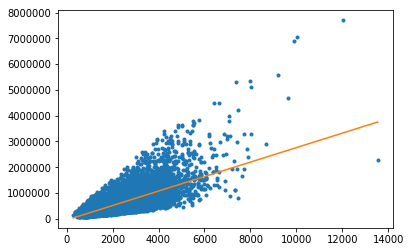

In [13]:
plt.plot(poly1_data['power_1'],df['price'],'.',
         poly1_data['power_1'],model1.predict(poly1_data[['power_1']]),'-')

### 2nd Degree and 3rd Degree polynomials


In [9]:
poly2_data = polynomial_dataframe(df['sqft_living'],2)
poly3_data = polynomial_dataframe(df['sqft_living'],3)
feature2 = poly2_data.columns
feature3 = poly3_data.columns

model2 = LinearRegression()
model2.fit(poly2_data[feature2],df[['price']])
model3 = LinearRegression()
model3.fit(poly3_data[feature3],df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Scatter plot for 2nd Degree Polynomials

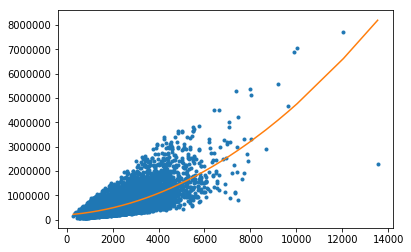

In [10]:
plt.plot(poly2_data['power_1'],df['price'],'.',
         poly2_data['power_1'],model2.predict(poly2_data[feature2]),'-')

### Scatter plot for 3rd Degree Polynomials

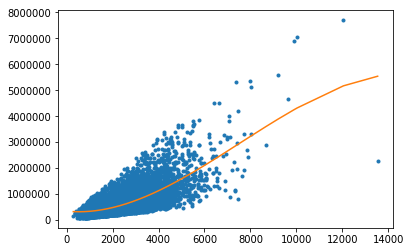

In [11]:
plt.plot(poly3_data['power_1'],df['price'],'.',
         poly3_data['power_1'],model3.predict(poly3_data[feature3]),'-')

### 15th Degree polynomials


In [12]:
poly15_data = polynomial_dataframe(df['sqft_living'],15)
feature15 = poly15_data.columns

model15 = LinearRegression()
model15.fit(poly15_data[feature15],df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Scatter plot for 15th Degree Polynomials

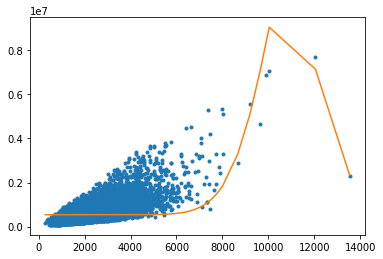

In [14]:
plt.plot(poly15_data['power_1'],df['price'],'.',
         poly15_data['power_1'],model15.predict(poly15_data[feature15]),'-')

In [15]:
print('Coefficient for 15th polynomials is: ', model15.coef_)
print('Intercept for 15th polynomials is: ', model15.intercept_)

Coefficient for 15th polynomials is:  [[  4.56404164e-91   6.91712206e-51  -5.84647252e-56  -4.97841222e-60
    0.00000000e+00   2.68575170e-71   2.26147568e-67   1.85900299e-63
    1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
    1.61618577e-44  -2.49283826e-48   9.59718336e-53]]
Intercept for 15th polynomials is:  [ 537116.32963776]


In [47]:
def draw_15_poly(X):
    X_poly = polynomial_dataframe(X['sqft_living'],15)
    feature = X_poly.columns
    X_poly['price'] = X['price']
    
    model = LinearRegression().fit(X_poly[feature],X_poly['price'])
    
    plt.plot(X_poly['power_1'],X_poly['price'],'.',
             X_poly['power_1'],model.predict(X_poly[feature]),'-')
    
    print('Coefficient for this validation set is: ', model.coef_)
    print('Intercept for this validation set is: ', model.intercept_)

Coefficient for this validation set is:  [  3.05794168e-90  -1.69394899e-49  -5.61775564e-55  -4.97841222e-60
   0.00000000e+00   1.10358351e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52]
Intercept for this validation set is:  539058.818669


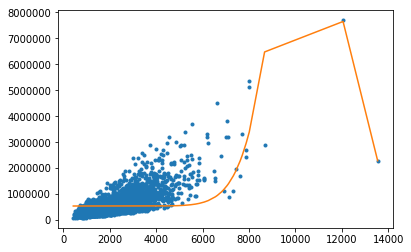

In [48]:
draw_15_poly(set1)

Coefficient for this validation set is:  [  2.71335943e-77   7.33542378e-39  -1.85052501e-44   1.39007354e-49
   0.00000000e+00   0.00000000e+00   3.64549213e-55   1.50416255e-51
   5.76015653e-48   1.95770493e-44   5.39396528e-41   9.40376341e-38
  -3.63529134e-41   4.65476514e-45  -1.97194701e-49]
Intercept for this validation set is:  506567.313481


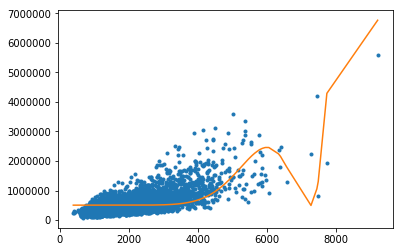

In [49]:
draw_15_poly(set2)

Coefficient for this validation set is:  [  2.83751934e-88  -7.80224144e-49   4.71701447e-55   0.00000000e+00
   0.00000000e+00   4.27894986e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51]
Intercept for this validation set is:  530874.316653


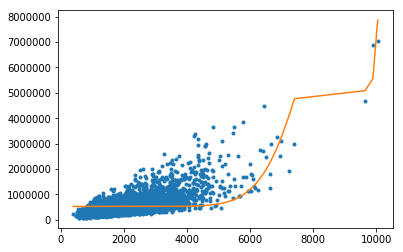

In [50]:
draw_15_poly(set3)

Coefficient for this validation set is:  [  1.37116050e-76   2.79679298e-40  -4.25065581e-44   6.00446563e-50
   0.00000000e+00   0.00000000e+00   1.27070051e-54   4.87868972e-51
   1.73549022e-47   5.47058320e-44   1.39587599e-40   2.25041871e-37
  -9.43954119e-41   1.31573060e-44  -6.09160663e-49]
Intercept for this validation set is:  494780.650823


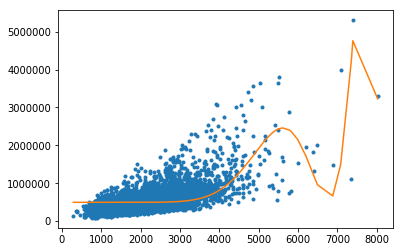

In [51]:
draw_15_poly(set4)

In [83]:
def RSS_validation(X_train, X_val, degree):
    X_train_p = polynomial_dataframe(X_train['sqft_living'],degree)
    train_feature = X_train_p.columns
    X_train_p['price'] = X_train['price']
    
    X_val_p = polynomial_dataframe(X_val['sqft_living'],degree)
    val_feature = X_val_p.columns
    X_val_p['price'] = X_val['price']    
    
    
    model = LinearRegression().fit(X_train_p[train_feature],X_train_p['price'])
    
    RSS = ((X_val_p['price'] - model.predict(X_val_p[val_feature]))**2).sum()
    
    return RSS, degree

In [84]:
answer =[]
for i in range(1,16):
    RSS= RSS_validation(X_train,X_val,i)
    answer.append(RSS)


#### 16. Quiz Question: Which degree (1, 2, â€¦, 15) had the lowest RSS on Validation data?



In [85]:
min(answer)

(566268592595529.6, 6)

#### 18. Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)



In [87]:
RSS_validation(X_train,X_test,min(answer)[1])

(135225114542140.44, 6)

6